In [1]:
import re
import pandas as pd

df = pd.read_csv('data.csv')
# program_name = df['ProgramName'].str.extract(r'[-—]([^-—]*)$', flags=re.MULTILINE)
# window_name = df['ProgramName'].str.extract(r'^(.*)[-—]', flags=re.MULTILINE)
df['ProcessName'] = df['ProcessName'].str.capitalize()

df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])
df['DeltaTime'] = df['EndTime'] - df['StartTime']
df['DeltaSeconds'] = df['DeltaTime'].dt.total_seconds()
df['DeltaMinutes'] = df['DeltaSeconds'] / 60
df

,WindowTitle,ProcessName,StartTime,EndTime,DeltaTime,DeltaSeconds,DeltaMinutes
0,pyTrak : pipenv — Yakuake,Yakuake,2023-05-21 18:29:56.341968,2023-05-21 18:29:57.628087,0 days 00:00:01.286119,1.286119,0.021435
1,timer.py - pyTrak - Visual Studio Code,Code,2023-05-21 18:29:57.638400,2023-05-21 18:29:58.025078,0 days 00:00:00.386678,0.386678,0.006445
2,pyTrak : pipenv — Yakuake,Yakuake,2023-05-21 18:29:58.046319,2023-05-21 18:29:58.425083,0 days 00:00:00.378764,0.378764,0.006313
3,timer.py - pyTrak - Visual Studio Code,Code,2023-05-21 18:29:58.427793,2023-05-21 18:31:48.707392,0 days 00:01:50.279599,110.279599,1.837993
4,pyTrak : pipenv — Yakuake,Yakuake,2023-05-21 18:31:48.716678,2023-05-21 18:31:48.925593,0 days 00:00:00.208915,0.208915,0.003482
...,...,...,...,...,...,...,...
130,Mozilla Firefox,Firefox,2023-05-22 05:33:24.819210,2023-05-22 05:56:36.158254,0 days 00:23:11.339044,1391.339044,23.188984
131,Desktop @ QRect(00 1920x1080) — Plasma,Plasmashell,2023-05-22 05:56:36.175318,2023-05-22 05:56:37.654269,0 days 00:00:01.478951,1.478951,0.024649
132,Jeff Goldblum & Craig Ferguson - Best Duo In T...,Firefox,2023-05-22 05:56:37.655853,2023-05-22 05:56:43.129599,0 days 00:00:05.473746,5.473746,0.091229
133,~ : zsh — Yakuake,Yakuake,2023-05-22 05:56:43.132376,2023-05-22 05:56:52.193873,0 days 00:00:09.061497,9.061497,0.151025


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

<Axes: ylabel='DeltaTime'>

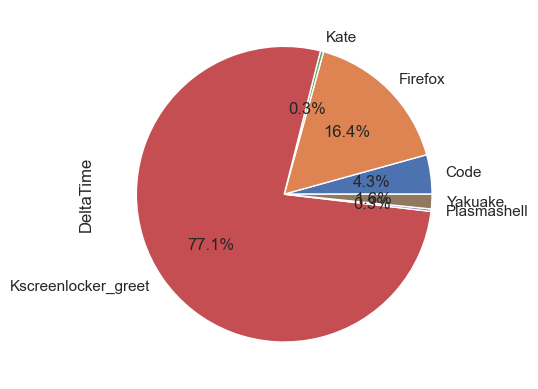

In [3]:
# Pie plot of time spent on each program
df.groupby('ProcessName').DeltaTime.sum().dt.seconds.plot.pie(y='DeltaTime', autopct='%1.1f%%')

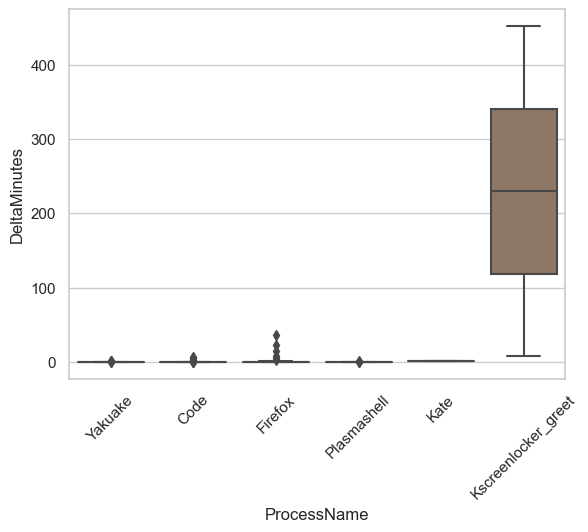

In [4]:
sns.boxplot(x="ProcessName", y="DeltaMinutes", data=df)
plt.xticks(rotation=45)

None